## Figure 1

In [1]:
# imports
import eelbrain as eb
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

# set matplotlib parameters
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 600

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,73.0,two-sided,0.003181,0.640394,0.720571


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,11.5,two-sided,0.000009,-0.947126,0.134958


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,29.0,two-sided,0.024188,0.620915,0.579667


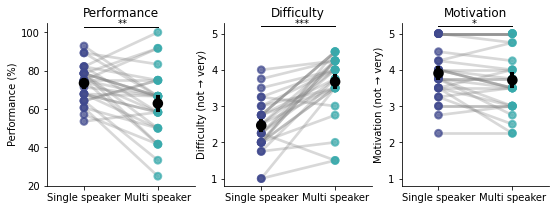

In [15]:
# plot figure 1A

# settings
behav = [(0, "Performance"), (1, "Difficulty"), (2, "Motivation")]
color_clear = matplotlib.colors.to_rgb('#40498eff')
color_dist = matplotlib.colors.to_rgb('#38aaacff')

# load data
ds = eb.load.unpickle("./data/trfs/trfs_lip.pickle")
ds_df = ds.as_dataframe()
ds_df["performance"] = ds_df["performance"]*100

# Wilcoxon signed-rank test
# performance
test_perf_wcox = pg.wilcoxon(ds_df.query("dist=='clear'").performance,
                        ds_df.query("dist=='dist'").performance)
display(test_perf_wcox)

# difficulty
test_diff_wcox = pg.wilcoxon(ds_df.query("dist=='clear'").difficulty,
                        ds_df.query("dist=='dist'").difficulty)
display(test_diff_wcox)

# motivation
test_mot_wcox = pg.wilcoxon(ds_df.query("dist=='clear'").motivation,
                        ds_df.query("dist=='dist'").motivation)
display(test_mot_wcox)

# plot
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for idx_axes, idx_behav in behav:

    fig1 = sns.pointplot(x='cond', y=idx_behav.lower(), hue="subject_id", data=ds_df, palette="mako", ax=axes[idx_axes])

    sns.despine()
    plt.setp(fig1.lines, alpha=.3, color="grey")
    plt.setp(fig1.collections, color=[color_clear, color_dist], alpha=0.7)
         
    fig2 = sns.pointplot(x="cond", y=idx_behav.lower(), data=ds_df, dodge=False, join=False, scale=1.2, errwidth=4, color="black", errorbar="se", ax=axes[idx_axes])
    plt.setp(fig2.lines, zorder=1)
    plt.setp(fig2.collections, zorder=1)
        
    fig2.set_title(idx_behav)
    fig2.set_xlabel("")
    fig2.set_xticklabels(["Single speaker", "Multi speaker"])
    fig2.get_legend().remove()
    
    if idx_behav == "Performance":
        fig1.set_ylim(20, 105)
        fig1.set_ylabel("Performance (%)")
        fig1.axhline(y=103, xmin=0.25, xmax=0.75, color='black', linestyle="solid", linewidth=1)
        fig1.text(x=0.45, y=103, s="**")
    elif idx_behav == "Difficulty":
        fig1.set_ylim(0.8, 5.3)
        fig1.set_ylabel("Difficulty (not → very)")
        fig1.axhline(y=5.2, xmin=0.25, xmax=0.75, color='black', linestyle="solid", linewidth=1)
        fig1.text(x=0.45, y=5.2, s="***")
    else:
        fig1.set_ylim(0.8, 5.3)
        fig1.set_ylabel("Motivation (not → very)")
        fig1.axhline(y=5.2, xmin=0.25, xmax=0.75, color='black', linestyle="solid", linewidth=1)
        fig1.text(x=0.45, y=5.2, s="*")    

